In this project, I have built image classification using TensorFlow 2.0 with convolutional neural network on the Fasion MNIST dataset.

Fashion MNIST desinged to be a drop in replacement for the MINST dataset, which today considered to be too easy for modern machine learning algorithms. One might consider to be a solved problem. Thus Fashion MNSIT was born and it was desinged to be a standared benchmark, just like MNIST but with goal post further ahead.
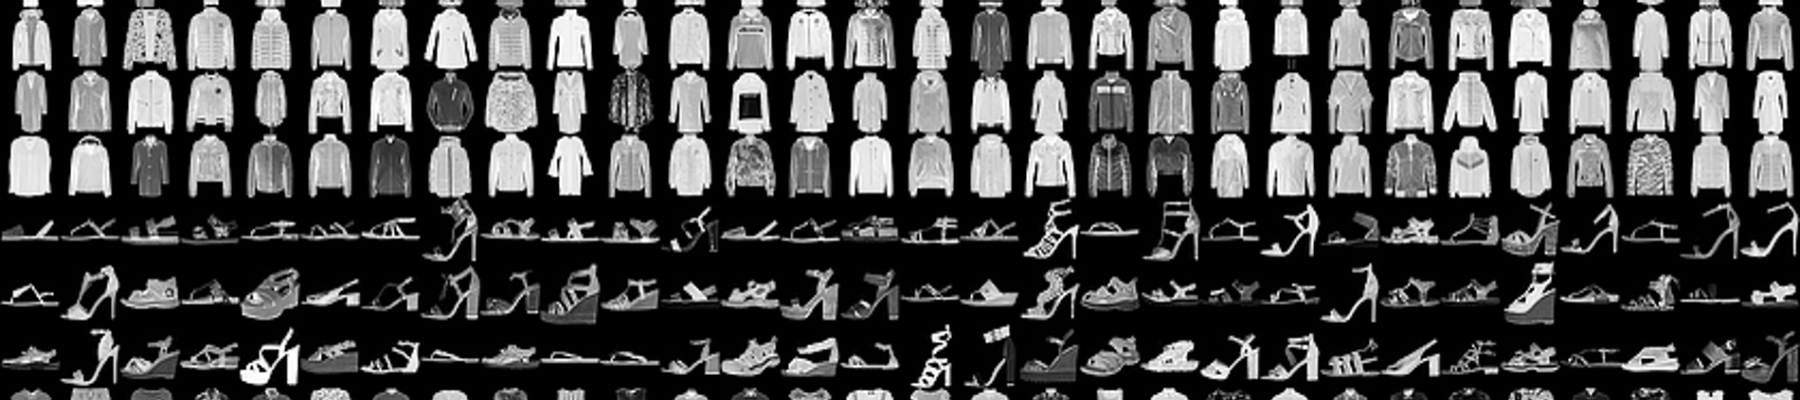

*   It's a dataset of 28*28 gray scale images.
*   The difference, instead of handwritten digits, we have images of diffrent types of clothing, like - Shirt, shoes, pants and so forth.



*   In this project the aim is to classify these images into the correct category





# Data


*   X.shape = N *28 * 28(grayscle)
*   Each image contains pixel values 0 to 255

*   Importantly this is not a right shape for CNN!
*   CNN expects N * H * W * C, where H=height , W=width and C=color/feature maps
*   We must reshape to N * 28 * 28 * 1
*   So in order to make a color channel, we have to add 4th dimension to the matrix of size one. We only a superflux dimension 






In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)




*   x_train.shape: (60000, 28, 28) tells us train and test contians only N * 28 * 28 grayscle images. 

*   CNN expects a 3-dimensional input fo the convolution operation. 

In [5]:
# The data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# Determine the number of classes
# Here, we want to know what's unique values in y_train.
# We have used set data structure, which allows only unique elements.

K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# Build CNN model using the Keras functional API.

# 1st model have three convolution layers.
# Here, model have followed the pattern of incresing the number of feature maps at each subsequent convolution layers.
# Model have constant size filter 3 * 3 
# Finally, model use stride of 2, so that the image dimensions get reduced by half after each convolution.
# Model use ReLU activation function.

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# Flatten layer to convert the images into a feature vector.
x = Flatten()(x)

# Dropout layers for regularization along with Dense layers
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

# We have K-classes and final activation function is a softmax.
x = Dense(K, activation='softmax')(x)

In [8]:
# Here, the varaible i represent input and x = output
# Pass these two model constructor.
# Here the arguments are the list of inputs I and output x.

model = Model(i, x)

In [9]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 24s 5ms/step - loss: 0.5266 - accuracy: 0.8041 - val_loss: 0.4177 - val_accuracy: 0.8446
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3609 - accuracy: 0.8647 - val_loss: 0.3542 - val_accuracy: 0.8690
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3131 - accuracy: 0.8823 - val_loss: 0.3113 - val_accuracy: 0.8873
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.8948 - val_loss: 0.3034 - val_accuracy: 0.8829
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2552 - accuracy: 0.9045 - val_loss: 0.2968 - val_accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2345 - accuracy: 0.9108 - val_loss: 0.2871 - val_accuracy: 0.8966
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2165 - accuracy: 0.9182 - val_loss: 0.2966 - val_accuracy

The model end up getting decent accuracy but it's definitely not as high as classic MNSIT. This is because, Fashion MNSIT dataset is more difficult.

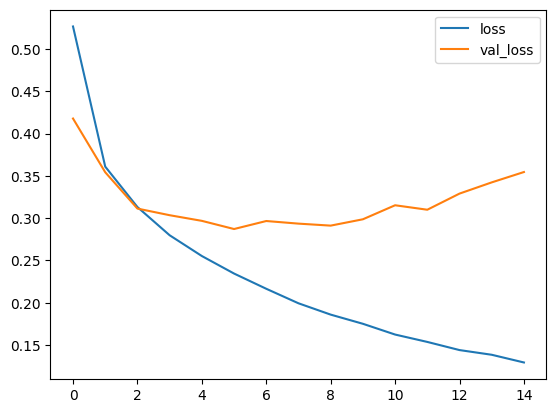

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

So it appears as if the model is overfitting a little bit, since the validation loss is going up slightly.

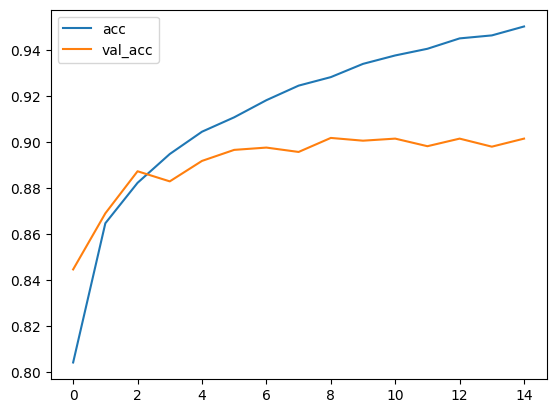

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Here, it looks like the validation accuracy stays pretty steady.
This is interesting to see, when the validation accuracy simultaneously goes up.

What this could mean is that model is becoming more and more confident in it's incorrect predictions. As when predictions become more and more incorrect, the loss gets bigger and bigger.

Of couse, a prediction becoming more incorrect when it was already incorrect would not affect accuracy.

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[883   0  24   9   3   1  76   0   4   0]
 [  4 979   0   7   2   1   6   0   1   0]
 [ 19   2 846  10  56   0  66   0   1   0]
 [ 17   5  21 886  42   1  26   0   2   0]
 [  0   1  60   6 857   1  72   0   3   0]
 [  0   0   0   1   0 963   0  26   0  10]
 [141   2  56  15  85   1 688   0  12   0]
 [  0   0   0   0   0   1   0 984   1  14]
 [  4   0   3   2   5   1   6   2 977   0]
 [  1   0   0   0   0   5   0  42   0 952]]


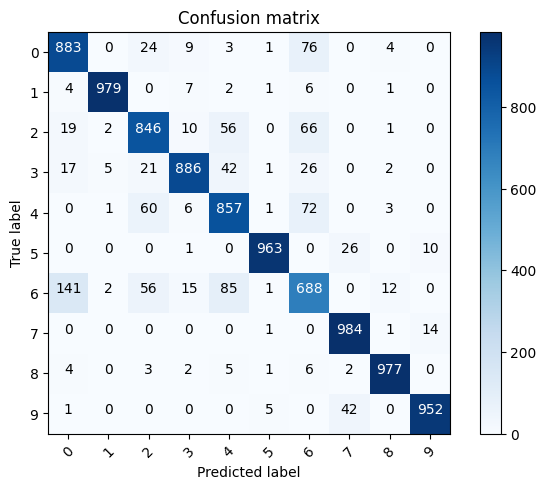

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Here we can see where the model is confused.
The two most wrong predictions, would be 76 and 141, so that's true label 0 and predicted label 6. And true label 6 and predicted label 4.

In the blow, we can see labels 6 is shirt. So it's interesting, it confuses T-shirt and top with shirt. Which kind of makes sense as they're both shirts.
But also 4 and 6, so that's Coat & shirt, which also kind of makes sense as they have same shape.

In [13]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

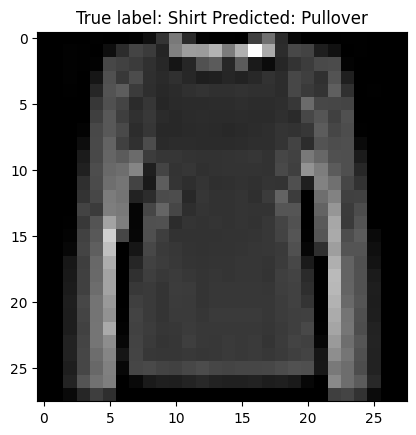

In [14]:
# Plot some misclassified samples.
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

And so if we look at this above random sample, we can see, it could be a shirt or could be a coat and also a top.

So Fasion MNSIT dataset is definitely more confusing than classic MNSIT dataset.